# Eksploracja i wykresy

[Piotr Migdał](http://migdal.wikidot.com/), 2015, [DELab UW](http://www.delab.uw.edu.pl/)

Pokażemy jak eksplorować dane, tworzyć różne rodzaje wykresów oraz przygotować je do regresji liniowej.

[SkillCraft - zbiór danych](http://summit.sfu.ca/item/13328 ) graczy z rozgrywek w strategię czasu rzeczywistego  [StarCraft 2](https://en.wikipedia.org/wiki/StarCraft_II:_Wings_of_Liberty), związanych a artykułem:

* Thompson JJ, Blair MR, Chen L, Henrey AJ (2013) [Video Game Telemetry as a Critical Tool in the Study of Complex Skill Learning.](http://dx.doi.org/10.1371/journal.pone.0075129) PLoS ONE 8(9): e75129.

Skrótowe infromacje w [tym archiwum](https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset), w szczególności opis zmiennych (przedstawiamy wybrane):

> * `2.` LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal) 
* `3.` Age: Age of each player (integer) 
* `4.` HoursPerWeek: Reported hours spent playing per week (integer) 
* `5.` TotalHours: Reported total hours spent playing (integer) 
* `6.` APM: Action per minute (continuous)

StarCraft jest narodowym (e-)sportem Korei Południowej. By poczuć dynamikę możemy rzucić okiem na najlepsze kawałki: 

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("gi29QPudrOw", start=24)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# wczytujemy dane; brakujące dane są oznaczone symbolem "?"
df = pd.read_csv("../dane/SkillCraft1_Dataset.csv", na_values=["?"])

In [4]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0,0.000019


In [5]:
df.groupby("LeagueIndex").size()
# lub podobnie:
# df["LeagueIndex"].value_counts().sort_index()

LeagueIndex
1    167
2    347
3    553
4    811
5    806
6    621
7     35
8     55
dtype: int64

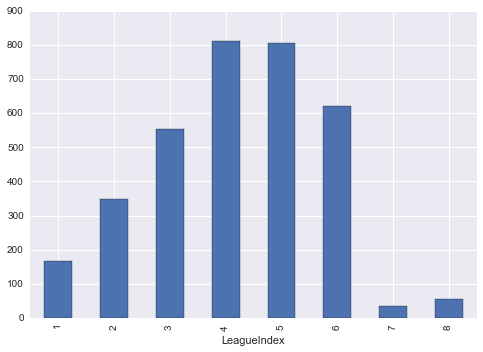

In [6]:
# lub graficznie
df.groupby("LeagueIndex").size().plot(kind='bar')

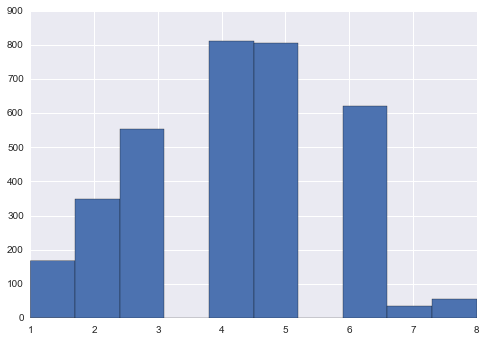

In [7]:
# dla danych dyskretnych często lepiej stosować bezpośrednie zliczanie, a nie histogram
# bo łatwo o "szczerby" i "zęby", gdy liczba binów jest inna niż liczba wartości 
df["LeagueIndex"].hist()

In [8]:
# zobaczmy nieliczne grupy: 7
df[df.LeagueIndex == 7].head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
104,357,7,21,24,1000,286.4538,0.017852,0.000717,6,0.000049,0.001298,0.006206,20.4232,30.9801,5.7171,30,0.001372,6,0.000000,0.000000
119,398,7,24,16,1250,216.6852,0.011957,0.000396,6,0.000528,0.000839,0.005691,21.6119,32.6225,5.0083,33,0.000688,8,0.000038,0.000000
320,953,7,25,42,2400,182.6208,0.005607,0.000310,8,0.000203,0.000662,0.005254,24.4969,38.6260,5.4065,18,0.001164,7,0.000000,0.000000
368,1096,7,19,56,1700,130.8600,0.003419,0.000552,5,0.000104,0.000069,0.003108,18.7416,52.3111,6.6667,15,0.000932,5,0.000000,0.000000


In [9]:
# zobaczmy nieliczne grupy: 7
df[df.LeagueIndex == 8].head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3340,10001,8,NaN,NaN,NaN,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0
3341,10005,8,NaN,NaN,NaN,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0
3342,10006,8,NaN,NaN,NaN,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0
3343,10015,8,NaN,NaN,NaN,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0
3344,10016,8,NaN,NaN,NaN,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0


In [10]:
# zatem brakuje niektórych danych, takich jak wiek i liczba godzin jakie grają
# zobaczmy, czy to tylko sprawa
df[df.LeagueIndex == 8].count()

GameID                  55
LeagueIndex             55
Age                      0
HoursPerWeek             0
TotalHours               0
APM                     55
SelectByHotkeys         55
AssignToHotkeys         55
UniqueHotkeys           55
MinimapAttacks          55
MinimapRightClicks      55
NumberOfPACs            55
GapBetweenPACs          55
ActionLatency           55
ActionsInPAC            55
TotalMapExplored        55
WorkersMade             55
UniqueUnitsMade         55
ComplexUnitsMade        55
ComplexAbilitiesUsed    55
dtype: int64

In [11]:
# zatem ograniczamy się z analizą lig prócz ostatniej
df = df[df.LeagueIndex < 8]

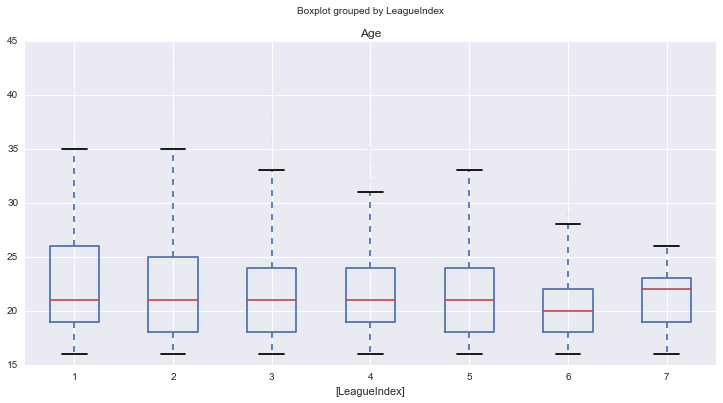

In [12]:
# boxplot: 'Age', grupowany po  'LeagueIndex'
df[["LeagueIndex","Age"]].boxplot(by="LeagueIndex", figsize=(12,6))

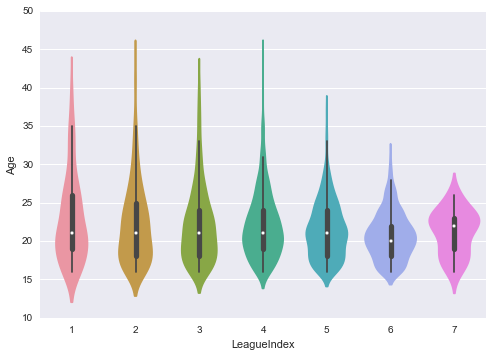

In [13]:
# albo to samo przy pomocy tzw. Violin plot
sns.violinplot(x="LeagueIndex", y="Age", data=df, order=[1, 2, 3, 4, 5, 6, 7])

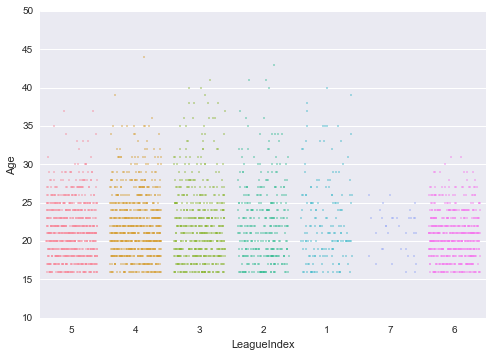

In [14]:
# można też się pokusić na wykres z punktów, ale 
sns.stripplot(x="LeagueIndex", y="Age", data=df, jitter=0.4, size=0.5)

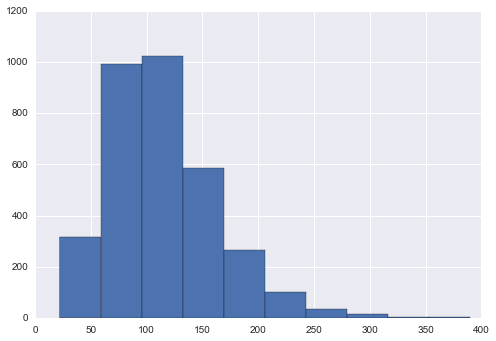

In [15]:
# histogram APM (kliknięć na minutę)
df['APM'].hist()

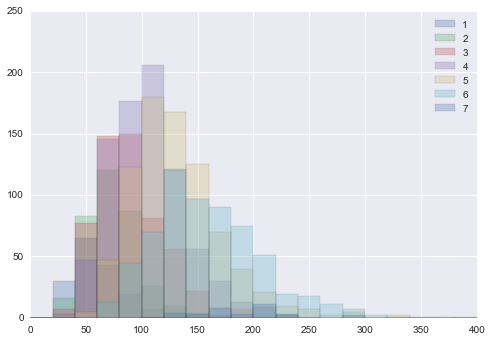

In [16]:
# nachodzące na siebie histogramy kliknięć, w rozbiciu na ligii
# iterujemy po grupach i dla każdej robimy histogram
# musimy ustalić zakres `range`, by podziałki przy osobnych histogramach były takie same

for nr_ligi, gracze in df.groupby("LeagueIndex")['APM']:
    gracze.hist(range=(0, 400), bins=20, alpha=0.3, label=str(nr_ligi))

plt.legend(loc="upper right")

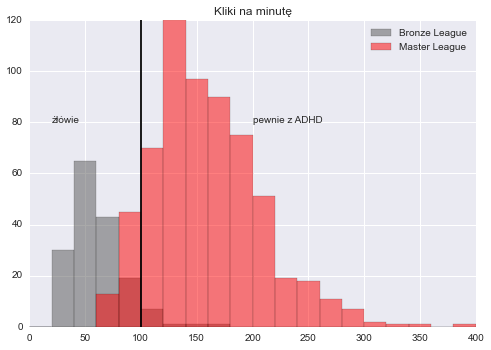

In [17]:
# a teraz wersja zaawansowana:
# ustalamy własne kolory i nazwy lig (przy pomocy słowników)
# ograniczamy się tylko do 1. i 6., by wykres był czytelny

kolorki = {1: "#555555", 6: "#ff0000"}
nazwa_ligi = {1: "Bronze League", 6: "Master League"}

for nr_ligi, gracze in df.query("LeagueIndex in [1,6]").groupby("LeagueIndex")['APM']:
    gracze.hist(range=(0, 400), bins=20, alpha=0.5,
                label=nazwa_ligi[nr_ligi], color=kolorki[nr_ligi])

# następnie anotujemy wedle uznania
plt.legend(loc="upper right")  # legenda z opcją gdzie
plt.title("Kliki na minutę")  # tytuł
plt.vlines(100, 0, 120)  # linia pionowa
plt.text(20, 80, "żłówie")  # tekst
plt.text(200, 80, "pewnie z ADHD")  # tekst

In [18]:
# w celu eksploracji zależności wieloczynnikowych zobaczmy medianę wieku
df["Age"].median()

21.0

In [19]:
# oraz godzin w tygodniu
df["HoursPerWeek"].median()

12.0

In [20]:
# tworzenie zmiennych binarnych
df["starzy"] = df["Age"] > df["Age"].median()
df["maniacy"] = df["HoursPerWeek"] > df["HoursPerWeek"].median()

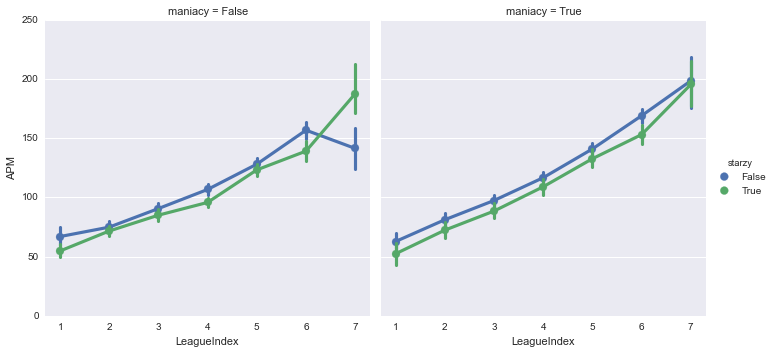

In [21]:
# factorplot pozwala towrzyć wykresy z podziałem na kolory, kolumny i wiersze, np:
sns.factorplot("LeagueIndex", "APM", data=df, hue="starzy", col="maniacy",
               kind="point")

In [22]:
# przy eksploracji DataFrame przydatną funkcją jest `describe`
# liczy statystyki dla każdej ze zmiennych
df.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,starzy,maniacy
count,3340.000000,3340.000000,3340.000000,3339.000000,3338.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,...,3340.000000,3340.000000,3340.000000,3340.00000,3340.000000,3340.000000,3340.000000,3340.000000,3340,3340
mean,4718.617964,4.121257,21.647904,15.910752,960.421809,114.572041,0.004024,0.000364,4.315569,0.000094,...,40.713822,64.206232,5.266340,22.11976,0.001031,6.540719,0.000060,0.000142,0.4482036,0.4658683
std,2656.893051,1.447896,4.206341,11.962912,17318.133922,48.098942,0.004725,0.000210,2.332845,0.000159,...,17.053777,19.032398,1.500627,7.44025,0.000520,1.858700,0.000111,0.000266,0.4973844,0.4989084
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,...,6.666700,24.632600,2.038900,5.00000,0.000077,2.000000,0.000000,0.000000,False,False
25%,2422.500000,3.000000,19.000000,8.000000,300.000000,79.235700,0.001247,0.000202,3.000000,0.000000,...,29.328000,50.915075,4.261350,17.00000,0.000682,5.000000,0.000000,0.000000,0,0
50%,4788.000000,4.000000,21.000000,12.000000,500.000000,107.070300,0.002447,0.000349,4.000000,0.000039,...,37.058900,61.296100,5.087050,22.00000,0.000904,6.000000,0.000000,0.000021,0,0
75%,6994.250000,5.000000,24.000000,20.000000,800.000000,140.112300,0.004947,0.000493,6.000000,0.000113,...,48.512750,74.031975,6.027050,27.00000,0.001258,8.000000,0.000087,0.000182,1,1
max,9271.000000,7.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001648,10.000000,0.003019,...,237.142900,176.372100,18.558100,58.00000,0.005149,13.000000,0.000902,0.003084,True,True


In [23]:
# w szczególności widzimy, że jeden (nad)gorliwy gracz grał milion godzin
# zobaczymy czy to może mieć sens... gdyby grała całą dobę, to ile lat by przegrał?
df["TotalHours"].max() / (24 * 365)

114.15525114155251

In [24]:
# nie ma możliwości (złwaszcza, że SC2 ma tylko 5 lat)
# najsensowniej usunąć wpis tworząc odpowiedni filtr
df = df[df["TotalHours"] < 24 * 365 * 5]

In [25]:
# a teraz kolejny 
df["TotalHours"].max() / (16 * 365)

4.2808219178082192

In [26]:
# dużo, ale nie da się wykluczyć!
# (choć ogólnie "self-reported data" często miewają takie smaczki)

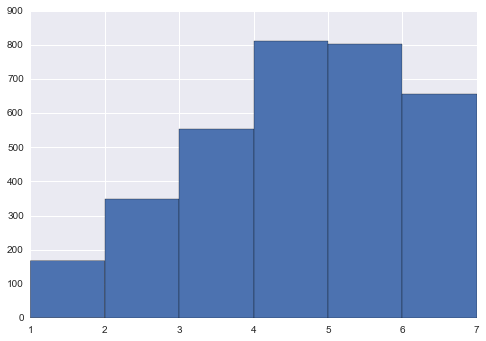

In [27]:
# wyższa liga, lepiej
df["LeagueIndex"].hist(bins=6)

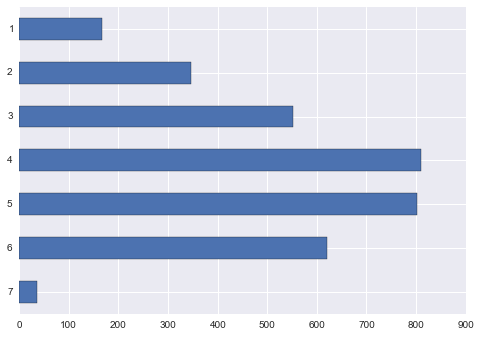

In [28]:
df["LeagueIndex"].value_counts().sort_index(ascending=False).plot(kind='barh')

In [29]:
# dla uproszczenia analizy ograniczmy się tylko do części kolumn
df_some = df.loc[:,"LeagueIndex":"APM"]

In [30]:
# zobaczmy jak to wygląda
df_some.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
0,5,27,10,3000,143.7180
1,5,23,10,5000,129.2322
2,4,30,10,200,69.9612
3,3,19,20,400,107.6016
4,3,32,10,500,122.8908


[Korelacja Pearsona](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) (tj. liniowa korelacja) pokazuje liniowe zależności między zmiennymi.

In [31]:
# tak robimy koreację między wszystkimi parami kolumn
df_some.corr()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
LeagueIndex,1.000000,-0.127381,0.217834,0.270729,0.624701
Age,-0.127381,1.000000,-0.184289,-0.032840,-0.210225
HoursPerWeek,0.217834,-0.184289,1.000000,0.255132,0.246656
TotalHours,0.270729,-0.032840,0.255132,1.000000,0.261008
APM,0.624701,-0.210225,0.246656,0.261008,1.000000


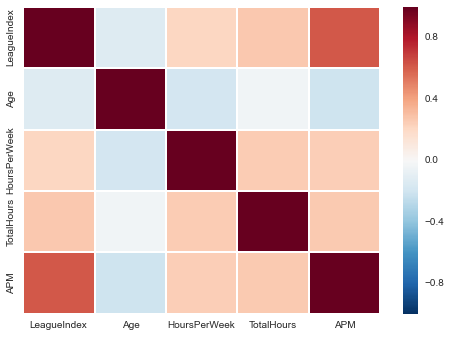

In [32]:
# i jako wykres:
sns.heatmap(df_some.corr())

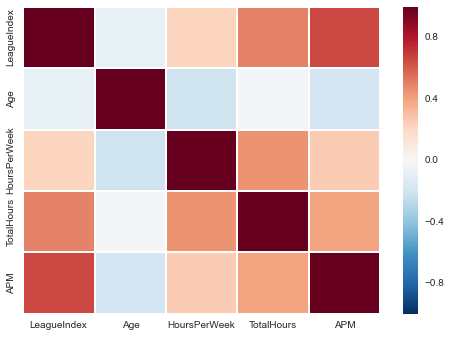

In [33]:
# i podobnie korelacja Spearmana (rankingowa korelacja)
# nie wymaga liniowości - i jest mniej czuła na pojedyczne, odstające wartości
sns.heatmap(df_some.corr(method='spearman'))

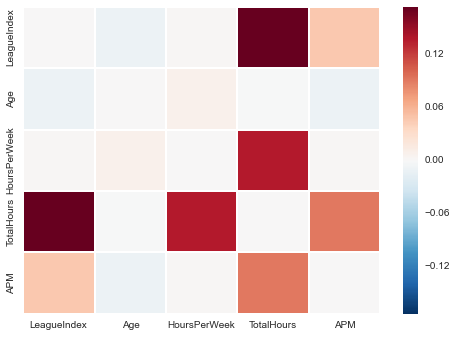

In [34]:
# możemy też wykreślić różnicę ich kwadratów
sns.heatmap(df_some.corr(method='spearman')**2 - df_some.corr(method='pearson')**2)

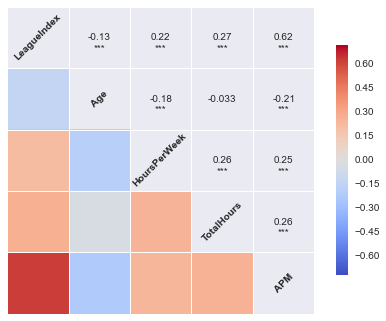

In [35]:
# istnieje też bezpośrednia metoda to tworzenia wykresów korelacji
sns.corrplot(df_some)

In [36]:
# tak iterujemy po nazwach kolumn
for col in df_some:
    print(col)

LeagueIndex
Age
HoursPerWeek
TotalHours
APM


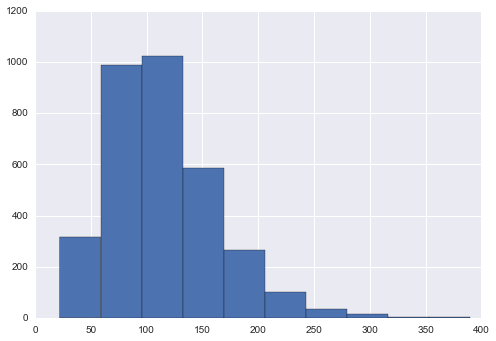

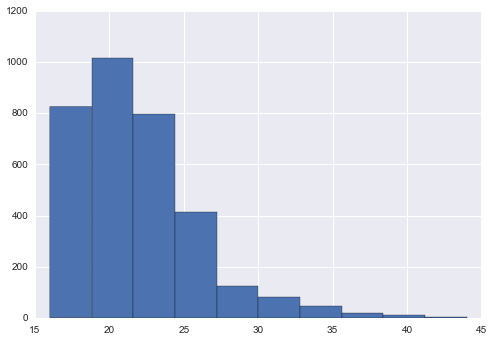

In [37]:
# ważna sprawa:
# domyślnie IPython składa wykresy z sobą;
# gdy chcemy narysować wykres i zacząć kolejny od nowa, piszemy `plt.show()`

df_some["APM"].hist()
plt.show()
df_some["Age"].hist()
# plt.show()  # tutaj można, ale nie trzeba - koniec komórki jest sygnałem, by narysować

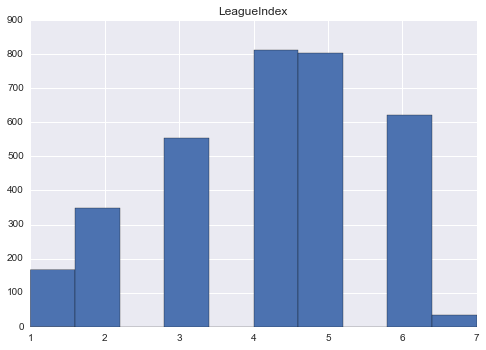

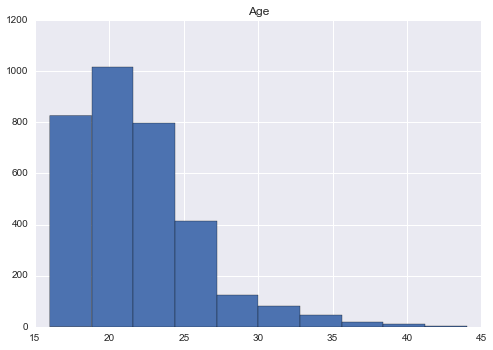

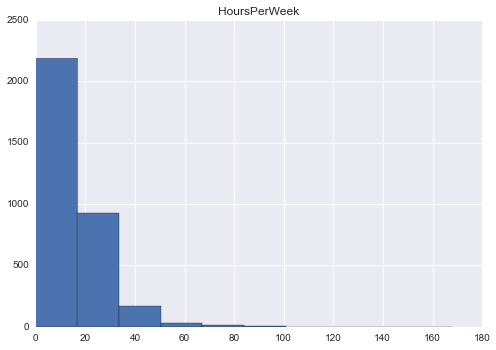

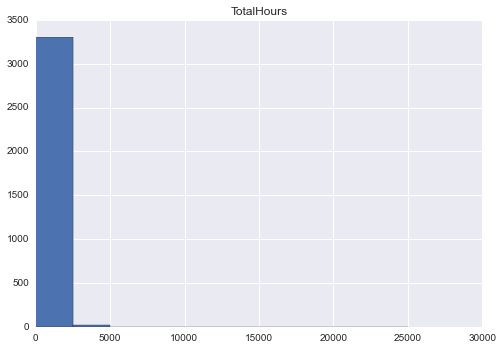

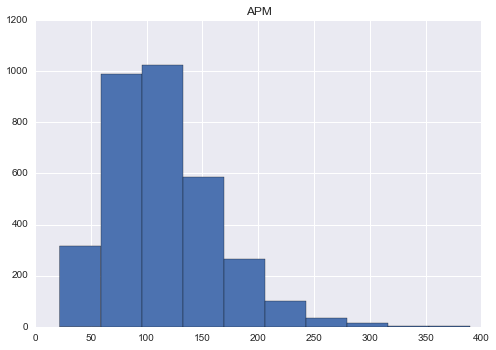

In [38]:
# zobaczmy histogramy wszystkich zmiennych
for col in df_some:
    df_some[col].hist()
    plt.title(col)
    plt.show()

In [39]:
# tworzymy nowe DataFrame (nie zapomieć o `.copy()`!)
df_przeskalowane = df_some.query("HoursPerWeek > 0")[["LeagueIndex"]].copy()

# transformujemy wartości
# warto dodać "log10" do nazwy, by później się nie pomylić z czym mamy do czynienia
for col in df_some.columns[1:]:
    df_przeskalowane[col + "_log10"] = np.log10(df_some[col])

In [40]:
df_przeskalowane.head()

,LeagueIndex,Age_log10,HoursPerWeek_log10,TotalHours_log10,APM_log10
0,5,1.431364,1.00000,3.477121,2.157511
1,5,1.361728,1.00000,3.698970,2.111371
2,4,1.477121,1.00000,2.301030,1.844857
3,3,1.278754,1.30103,2.602060,2.031819
4,3,1.505150,1.00000,2.698970,2.089519


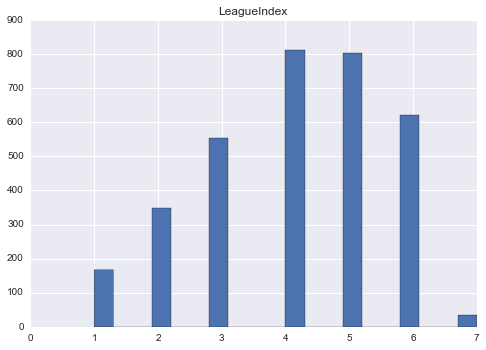

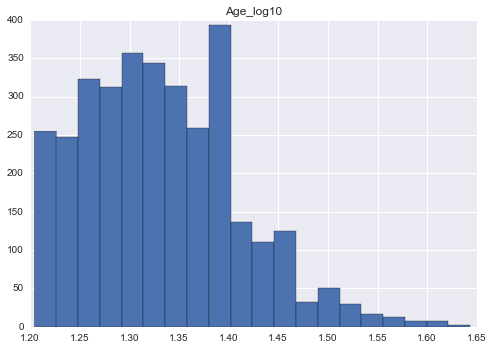

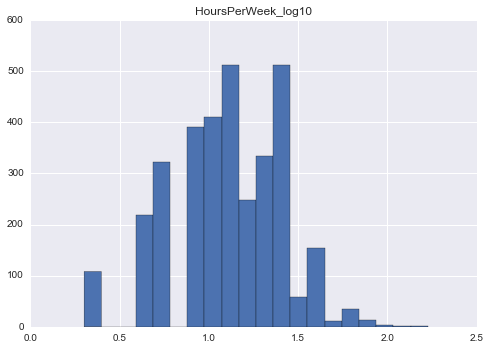

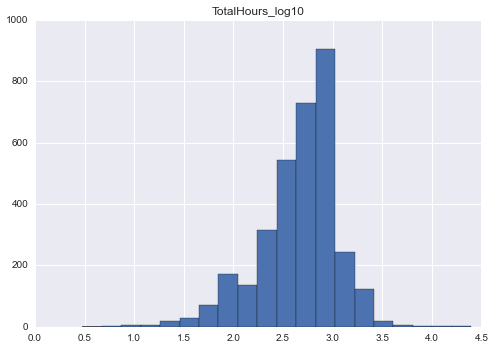

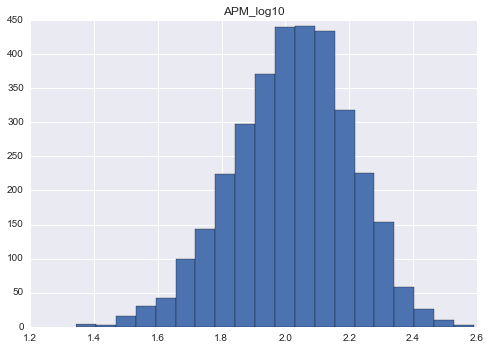

In [41]:
# Wydaje sie, ze dla wszystkiego procz ligii lepsza bylaby skala logarytmiczna
for col in df_przeskalowane:
    df_przeskalowane[col].hist(bins=20)
    plt.title(col)
    plt.show()

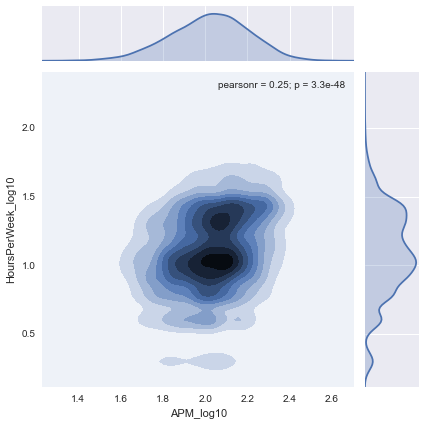

In [42]:
# dostaliśmy bardziej "przyzwoite" rozkłady (podobniejsze do gaussowskiego)
# a teraz zobaczmy jak wyglądają zależności wielu zmiennych
# spróbuj też inne zmienne lub inne `kind` (np. `scatter`, `reg` lub `hex`)
sns.jointplot(x="APM_log10", y="HoursPerWeek_log10",
              data=df_przeskalowane, kind="kde")

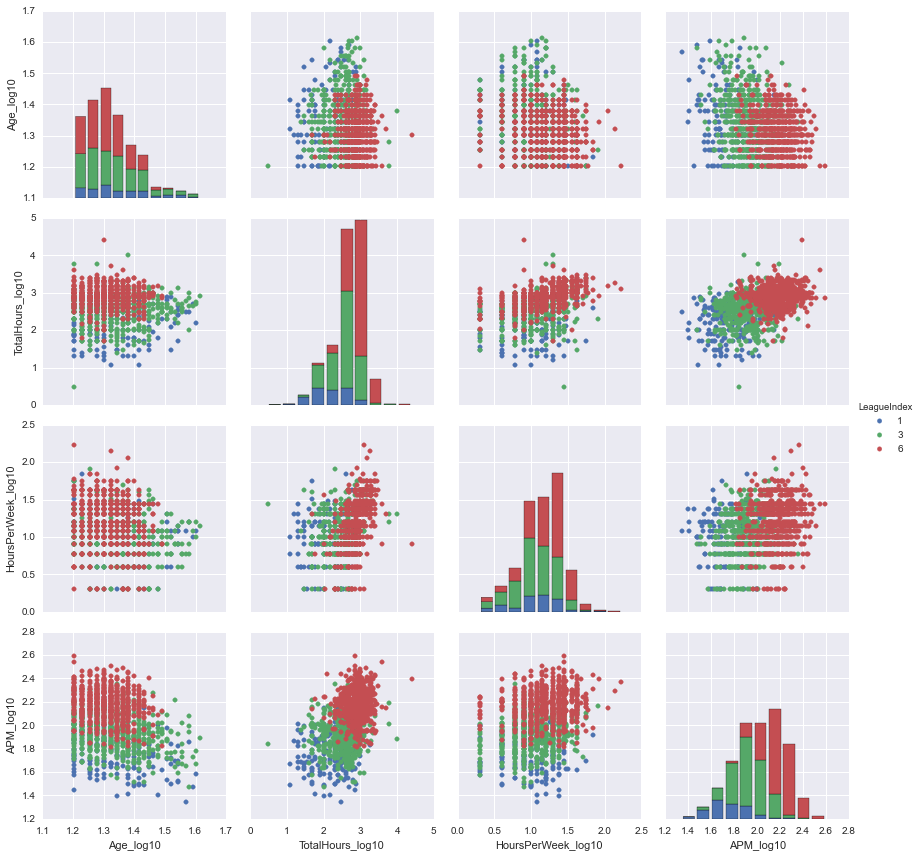

In [43]:
# i tabela
sns.pairplot(df_przeskalowane.query("LeagueIndex in [1,3,6]"),
             hue="LeagueIndex",
             vars=['Age_log10', 'TotalHours_log10', 'HoursPerWeek_log10', 'APM_log10'])

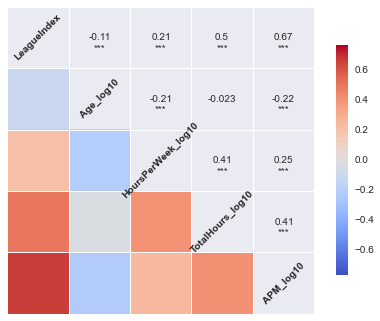

In [44]:
# spójrzmy teraz na korelacje przeskalowanych zmiennych zmienne
sns.corrplot(df_przeskalowane)

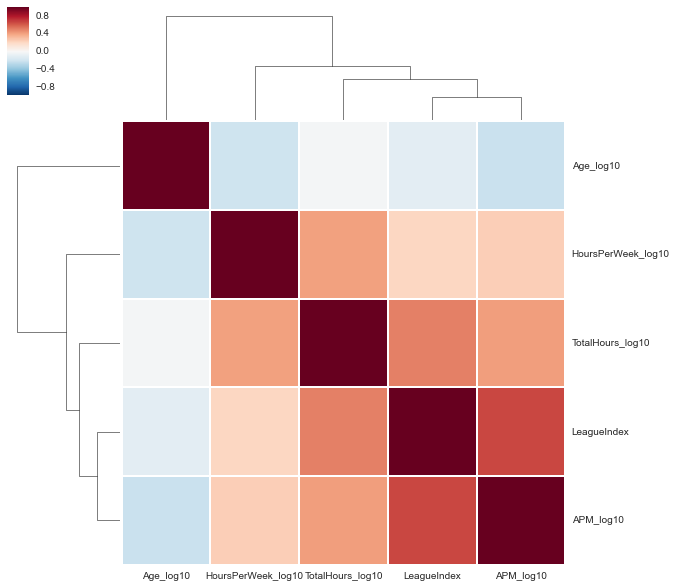

In [45]:
# ciekawym rozwiązaniem jest clustermap, który grupuje podobne zmienne
sns.clustermap(df_przeskalowane.corr())

## Zobacz też

* [Seaborn: statistical data visualization](http://stanford.edu/~mwaskom/software/seaborn/) (w chwili tworzenia tego skryptu w wersji 0.6.0)
    * [Visualizing the distribution of a dataset](http://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html)
    * [Visualizing linear relationships](http://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html)
    * [Plotting with categorical data](http://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html)